In [7]:
import torch
import pickle
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from soft_thresholding.SoftThresholdNet import SoftThresholdNet

from plain_net.PlainNet import PlainNet
from duffing_dataset import *

In [19]:
with open('data/duffing/duffing_dataset.pickle', 'rb') as f:
    train_data = pickle.load(f)

with open('data/duffing/duffing_dataset_test.pickle', 'rb') as f:
    test_data = pickle.load(f)

In [20]:
t_train = torch.linspace(0, train_data.DT * len(train_data.x), len(train_data.y))
t_test = torch.linspace(0, test_data.DT * len(test_data.x), len(test_data.y))

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, shuffle=True)

In [21]:
model = SoftThresholdNet(3, [[24, 24], [24, 24]], 2, s_init=1)

In [22]:
model.train_n_epochs(data_loader=train_loader, n_epochs = 1000, lr = 0.00001, weight_decay=0.0001, verbose=True)

Epoch 0: loss 11.742369651794434
Epoch 100: loss 1.648926854133606
Epoch 200: loss 0.2627043128013611
Epoch 300: loss 0.13935963809490204
Epoch 400: loss 0.1683637797832489
Epoch 500: loss 0.16490019857883453
Epoch 600: loss 0.13229194283485413
Epoch 700: loss 0.1146315485239029
Epoch 800: loss 0.31846535205841064
Epoch 900: loss 0.11877172440290451


In [23]:
y_pred = model(test_loader.dataset.x)

In [24]:
torch.sum((y_pred - test_loader.dataset.y)**2) / len(test_loader.dataset.y)

tensor(0.2794, grad_fn=<DivBackward0>)

ValueError: x and y must have same first dimension, but have shapes torch.Size([9990]) and (4990,)

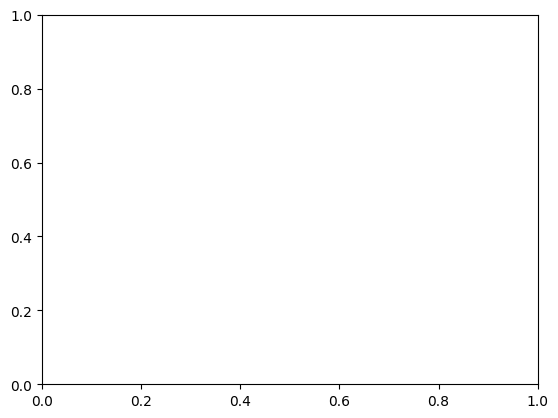

In [29]:
plt.plot(t, y_pred[:, 0].detach().numpy(), label='pred')
plt.plot(t, test_loader.dataset.y[:, 0].detach().numpy(), label='true', linestyle='--')
plt.legend()

In [60]:
s_threshhold = [layer.s.detach().item() for layer in model.layers]

In [61]:
s_threshhold

[0.8642807006835938, 1.162282943725586, 1.038082242012024, 0.8769857287406921]

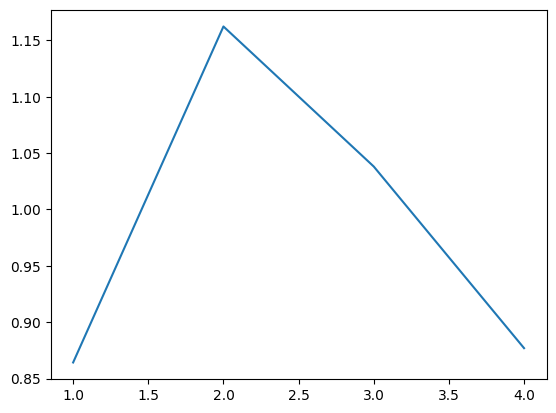

In [62]:
plt.plot(np.linspace(1, len(s_threshhold), len(s_threshhold)), s_threshhold)

In [63]:
model.get_sparsity()

tensor(0.6808)

In [64]:
model.layers[0].get_sparse_weights()

tensor([[-1.2573, -0.9365,  0.0000,  0.6728, -0.4489, -0.0000,  0.1330, -0.0000,
          0.0000,  0.0000,  0.5550,  0.0000, -1.0030, -0.2766, -0.0000, -0.3034,
          0.0000, -0.0000,  0.0000, -0.6590,  0.1307,  1.0910, -0.2309,  0.9357],
        [ 0.0000, -0.0000, -0.1805,  0.0000,  0.0000, -0.2149,  1.0296,  0.0000,
         -0.8261,  0.0000,  0.0000,  0.0000,  0.2248, -0.0000,  1.5845, -0.0000,
          0.4919, -0.0000, -0.0000,  0.0000,  0.3709, -0.0000, -0.6253,  0.0000],
        [-0.6906, -0.0000,  1.7637, -0.0000,  0.0000, -0.0000,  0.6700,  0.5790,
          0.0000,  0.5110,  0.6749,  0.3496,  1.2029,  0.4445, -0.4895, -0.0000,
          0.0000,  0.6824,  0.0000, -0.0000, -0.0000,  0.5447,  0.0000, -0.0000]],
       grad_fn=<MulBackward0>)